<a href="https://colab.research.google.com/github/Rivianee/data-science/blob/master/desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #importando as bibliotecas
import seaborn as sns


In [2]:
data = pd.read_excel("MKT.xlsx") #importando a tabela excel
data.head() # exibir os primeiros dados da tabela

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [3]:
data.tail() # últimas 5 linhas

,youtube,facebook,newspaper,sales
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60
170,278.52,10.32,10.44,16.08


In [4]:
data.info() #ver os tipos de dados e se tem valores nulos na tabela

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [5]:
data.describe() #estatística descritiva

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [6]:
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import pandas_profiling

<ipython-input-9-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [10]:
data.profile_report() 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:ylabel='Count'>

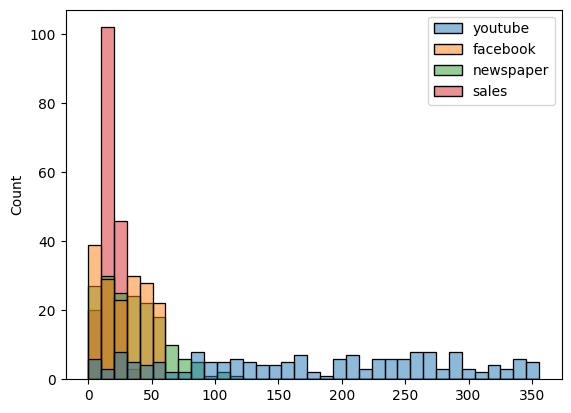

In [12]:
sns.histplot(data) # Avaliação de histograma dos dados

In [13]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 6.0 MB/s eta 0:00:00


Entenda os dados com a análise exploratória. Nesta etapa do desafio, você pode
utilizar gráficos e visualizações para identificar padrões, relações e tendências
entre as variáveis e investigar possíveis correlações.

In [14]:
data.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


In [15]:
X = data[['youtube','facebook','newspaper']]
Y = data[["sales"]]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size=0.3, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regressao = LinearRegression()

In [20]:
regressao.fit(X_train, Y_train)

LinearRegression()

In [21]:
y_pred = regressao.predict(X_test)

In [22]:
from sklearn.metrics import r2_score
r = r2_score(Y_test, y_pred)

In [23]:
print("r_quadrado",r)

r_quadrado 0.882423505618885


In [24]:
import matplotlib.pyplot as plt

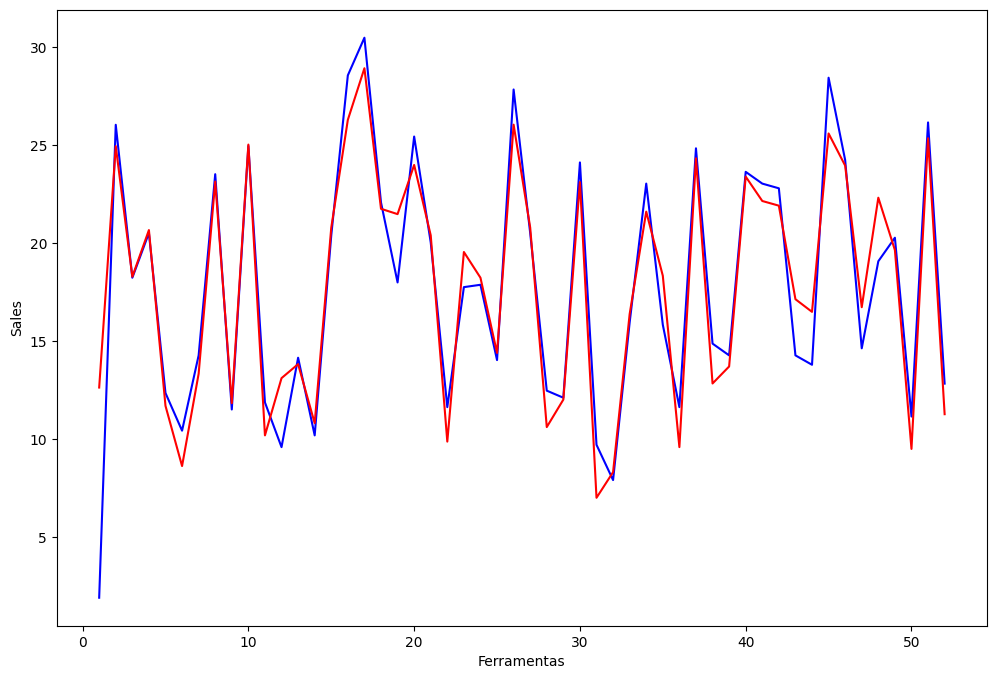

In [25]:
c = [i for i in range(1, 53, 1)]
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(c, Y_test, color = "blue")
plt.plot(c, y_pred, color = "red")
plt.xlabel("Ferramentas")
plt.ylabel("Sales");

In [26]:
#Predição de valores

Avg_youtube = 150.00
Avg_facebook = 27.00
Avg_newspaper = 40.00
entrada =[[Avg_youtube, Avg_facebook, Avg_newspaper]]
regressao.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.52105498])